**Desarrollado por:** Javier Fernando Botía Valderrama

*Docente del Departamento de Ingeniería de Sistemas*

**Materia:** Análisis Avanzado de Datos

**Departamento:** Ingeniería Aeroespacial

**Facultad de Ingeniería - Universidad de Antioquia**

# Otras Aplicaciones de Pandas y Numpy - Nociones de Scipy

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import trim_mean
from scipy.stats import gmean # Media Geométrica
import numpy.matlib
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib

## Intepretaciones de la media

In [ ]:
url = "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/sonar.dat"
data = pd.read_csv(url)
display(data)

,Band1,Band2,Band3,Band4,Band5,Band6,Band7,Band8,Band9,Band10,...,Band52,Band53,Band54,Band55,Band56,Band57,Band58,Band59,Band60,Type
0,0.020,0.037,0.043,0.021,0.095,0.099,0.154,0.160,0.311,0.211,...,0.003,0.006,0.016,0.007,0.017,0.018,0.008,0.009,0.003,R
1,0.045,0.052,0.084,0.069,0.118,0.258,0.216,0.348,0.334,0.287,...,0.008,0.009,0.005,0.009,0.019,0.014,0.005,0.005,0.004,R
2,0.026,0.058,0.110,0.108,0.097,0.228,0.243,0.377,0.560,0.619,...,0.023,0.017,0.010,0.018,0.024,0.032,0.016,0.010,0.008,R
3,0.010,0.017,0.062,0.020,0.020,0.037,0.110,0.128,0.060,0.126,...,0.012,0.004,0.015,0.008,0.007,0.005,0.004,0.004,0.012,R
4,0.076,0.067,0.048,0.039,0.059,0.065,0.121,0.247,0.356,0.446,...,0.003,0.005,0.010,0.011,0.002,0.007,0.005,0.011,0.009,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.019,0.035,0.017,0.018,0.039,0.163,0.203,0.169,0.233,0.268,...,0.012,0.010,0.020,0.003,0.010,0.006,0.012,0.019,0.016,M
204,0.032,0.010,0.030,0.056,0.076,0.096,0.099,0.102,0.103,0.215,...,0.006,0.009,0.014,0.006,0.006,0.003,0.003,0.006,0.007,M
205,0.052,0.044,0.018,0.029,0.035,0.117,0.126,0.118,0.126,0.253,...,0.016,0.003,0.005,0.006,0.009,0.014,0.014,0.008,0.003,M
206,0.030,0.035,0.049,0.061,0.017,0.135,0.146,0.112,0.194,0.235,...,0.009,0.005,0.013,0.004,0.004,0.003,0.008,0.004,0.005,M


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Band1    208 non-null    float64
 1    Band2   208 non-null    float64
 2    Band3   208 non-null    float64
 3    Band4   208 non-null    float64
 4    Band5   208 non-null    float64
 5    Band6   208 non-null    float64
 6    Band7   208 non-null    float64
 7    Band8   208 non-null    float64
 8    Band9   208 non-null    float64
 9    Band10  208 non-null    float64
 10   Band11  208 non-null    float64
 11   Band12  208 non-null    float64
 12   Band13  208 non-null    float64
 13   Band14  208 non-null    float64
 14   Band15  208 non-null    float64
 15   Band16  208 non-null    float64
 16   Band17  208 non-null    float64
 17   Band18  208 non-null    float64
 18   Band19  208 non-null    float64
 19   Band20  208 non-null    float64
 20   Band21  208 non-null    float64
 21   Band22  208 non

In [ ]:
data = data.iloc[:,0:60] # Seleccionamos hasta la columna 59

Calculo de la Media Clásica y la Media Ajustada o Recortada

In [ ]:
Media_Clasica = data.mean()
Media_Clasica = Media_Clasica.values
Indices_Tabla_Medias = data.columns
Media_Ajustada = trim_mean(data.values, 0.1)
Tabla_Medias = pd.concat([pd.DataFrame(Media_Clasica, columns = ['Media Clásica'], index = Indices_Tabla_Medias), 
                          pd.DataFrame(Media_Ajustada, columns = ['Media Ajustada'], index =  Indices_Tabla_Medias)],
                         axis = 1)
display(Tabla_Medias)

,Media Clásica,Media Ajustada
Band1,0.029173,0.025113
Band2,0.038428,0.033113
Band3,0.043870,0.037696
Band4,0.053889,0.046917
Band5,0.075231,0.067923
Band6,0.104572,0.098875
Band7,0.121755,0.116881
Band8,0.134793,0.124167
Band9,0.178005,0.162750
Band10,0.208260,0.191530


Observen que la media clásica es más grande que la media ajustada en la mayoría de variables pero hay algunas variables que muestran que la media ajustada es mayor la media clásica. Usualmente, este comportamiento se debe a que la media ajustada calcula la media por eliminación de un número fijo de valores ordenados en los extremos máximos y mínimos (es decir, los valores máximos y mínimos de cada variable o columna). Por consiguiente, la media ajustada solo calcula la media con los valores restantes luego de la mencionada eliminación. El parámetro de 0.1 indica que disminuye un 10% de ambos extremos, lo cual, entre más grande sea este parámetro, se eliminan más valores que representa los extremos máximos y mínimos (sugiero usar un valor de 10% como valor por defecto).

In [ ]:
Porcentaje = []
Tablita = Tabla_Medias.values

for n in range(len(Tablita)):
  if Tablita[n,0] >= Tablita[n,1]:
     P = 100 - ((Tablita[n,1]/Tablita[n,0])*100)
     Porcentaje.append(P)
  elif Tablita[n,0] < Tablita[n,1]:
    P = 100 - ((Tablita[n,0]/Tablita[n,1])*100)
    Porcentaje.append(P)

Porcentaje = pd.DataFrame(Porcentaje, columns = ['Porcentaje de Diferencia entre ambas medias'], index = Indices_Tabla_Medias)
display(Porcentaje)

,Porcentaje de Diferencia entre ambas medias
Band1,13.916879
Band2,13.830554
Band3,14.072798
Band4,12.939007
Band5,9.714310
Band6,5.448025
Band7,4.003009
Band8,7.883630
Band9,8.569885
Band10,8.033172


Otra forma de calcular la media es mediante la media ponderada, el cual se le asigna a cada fila de la base de datos un valor de peso. Por lo general, hay varias formas de calcular el vector de pesos, tal y como se muestra a continuación:

In [ ]:
Vector_Peso = data.mean(axis = 1) # Calculamos el promedio de cada fila
Media_Ponderada = (data.T*Vector_Peso).sum(axis = 1) / Vector_Peso.sum() # Cálculo de la Media Ponderada - Centroide
display(Media_Ponderada)

Band1      0.030008
 Band2     0.039600
 Band3     0.044963
 Band4     0.055064
 Band5     0.077316
 Band6     0.107510
 Band7     0.124917
 Band8     0.139658
 Band9     0.185271
 Band10    0.216405
 Band11    0.244242
 Band12    0.256959
 Band13    0.280426
 Band14    0.304062
 Band15    0.327797
 Band16    0.388254
 Band17    0.426857
 Band18    0.461556
 Band19    0.515071
 Band20    0.574812
 Band21    0.620287
 Band22    0.634739
 Band23    0.653908
 Band24    0.676841
 Band25    0.678281
 Band26    0.701039
 Band27    0.702198
 Band28    0.694766
 Band29    0.642068
 Band30    0.585519
 Band31    0.510256
 Band32    0.447197
 Band33    0.424172
 Band34    0.411494
 Band35    0.402915
 Band36    0.396327
 Band37    0.375190
 Band38    0.350745
 Band39    0.335990
 Band40    0.320802
 Band41    0.298018
 Band42    0.287180
 Band43    0.255138
 Band44    0.224044
 Band45    0.208869
 Band46    0.168659
 Band47    0.126498
 Band48    0.094404
 Band49    0.053753
 Band50    0.021056


In [ ]:
Vector_Peso_Normalizado = Vector_Peso/(Vector_Peso.sum())
Media_Ponderada_Normalizado = (data.T*Vector_Peso_Normalizado).sum(axis = 1) / Vector_Peso_Normalizado.sum() 
# Cálculo de la Media Ponderada - Centroide con valores de pesos normalizados
display(Media_Ponderada_Normalizado)

Band1      0.030008
 Band2     0.039600
 Band3     0.044963
 Band4     0.055064
 Band5     0.077316
 Band6     0.107510
 Band7     0.124917
 Band8     0.139658
 Band9     0.185271
 Band10    0.216405
 Band11    0.244242
 Band12    0.256959
 Band13    0.280426
 Band14    0.304062
 Band15    0.327797
 Band16    0.388254
 Band17    0.426857
 Band18    0.461556
 Band19    0.515071
 Band20    0.574812
 Band21    0.620287
 Band22    0.634739
 Band23    0.653908
 Band24    0.676841
 Band25    0.678281
 Band26    0.701039
 Band27    0.702198
 Band28    0.694766
 Band29    0.642068
 Band30    0.585519
 Band31    0.510256
 Band32    0.447197
 Band33    0.424172
 Band34    0.411494
 Band35    0.402915
 Band36    0.396327
 Band37    0.375190
 Band38    0.350745
 Band39    0.335990
 Band40    0.320802
 Band41    0.298018
 Band42    0.287180
 Band43    0.255138
 Band44    0.224044
 Band45    0.208869
 Band46    0.168659
 Band47    0.126498
 Band48    0.094404
 Band49    0.053753
 Band50    0.021056


A partir del vector de pesos normalizado, podemos calcular la propagación de la incertidumbre en cada variable o columna de la base de datos, considerando la desviación estándar de cada columna y asumiendo que que cada columna es independiente una con respecto a la otra con la misma función de distribución de probabilidad (por defecto: función de densidad de probabilidad normal).

In [ ]:
desv_estandar = data.std(axis = 0) # Calculamos la desviación estándar de cada columna
Radical = np.sqrt((Media_Ponderada_Normalizado**2).sum())
Propagacion_Incertidumbre = desv_estandar*Radical
display(Propagacion_Incertidumbre) # Entre más bajo sea el valor de la propagación de la incertidumbre
                                   # menor sesgo generará dicha variable, asumiendo que sigue una 
                                   # distribución de probabilidad normal.

Band1      0.065144
 Band2     0.093425
 Band3     0.108949
 Band4     0.131829
 Band5     0.157506
 Band6     0.167560
 Band7     0.175314
 Band8     0.241326
 Band9     0.335679
 Band10    0.381117
 Band11    0.376153
 Band12    0.397046
 Band13    0.399641
 Band14    0.466454
 Band15    0.582439
 Band16    0.659672
 Band17    0.747651
 Band18    0.741477
 Band19    0.731414
 Band20    0.744700
 Band21    0.731091
 Band22    0.725483
 Band23    0.709360
 Band24    0.677996
 Band25    0.694503
 Band26    0.672615
 Band27    0.696573
 Band28    0.672520
 Band29    0.681211
 Band30    0.625936
 Band31    0.606803
 Band32    0.604690
 Band33    0.585489
 Band34    0.655666
 Band35    0.734729
 Band36    0.748869
 Band37    0.680288
 Band38    0.603830
 Band39    0.564501
 Band40    0.506617
 Band41    0.485276
 Band42    0.478457
 Band43    0.394058
 Band44    0.377902
 Band45    0.429904
 Band46    0.379662
 Band47    0.246632
 Band48    0.176954
 Band49    0.101949
 Band50    0.038685


Otra forma de calcular la media ponderada es mediante la **media ponderada definida por varianza**, el cual asume una reciprocidad de la varianza de los datos para cada fila. Veamos como se realiza dicho cálculo:

In [ ]:
varianza_fila = data.var(axis = 1)
Peso_recipocidad_varianza = 1/varianza_fila
Media_Ponderada_Varianza = (data.T/varianza_fila).sum(axis = 1) / Peso_recipocidad_varianza.sum()
display(Media_Ponderada_Varianza)

Band1      0.030356
 Band2     0.040839
 Band3     0.047135
 Band4     0.057888
 Band5     0.077317
 Band6     0.104045
 Band7     0.120624
 Band8     0.133690
 Band9     0.176108
 Band10    0.204662
 Band11    0.232915
 Band12    0.247732
 Band13    0.269642
 Band14    0.293806
 Band15    0.316646
 Band16    0.371027
 Band17    0.402372
 Band18    0.434468
 Band19    0.484505
 Band20    0.541256
 Band21    0.584407
 Band22    0.593511
 Band23    0.620134
 Band24    0.652374
 Band25    0.654720
 Band26    0.680382
 Band27    0.687306
 Band28    0.683077
 Band29    0.631973
 Band30    0.569918
 Band31    0.495127
 Band32    0.429118
 Band33    0.408345
 Band34    0.394993
 Band35    0.382974
 Band36    0.377480
 Band37    0.356549
 Band38    0.335926
 Band39    0.327294
 Band40    0.314002
 Band41    0.294524
 Band42    0.284105
 Band43    0.247322
 Band44    0.210455
 Band45    0.196095
 Band46    0.162720
 Band47    0.124082
 Band48    0.092994
 Band49    0.052723
 Band50    0.020469


La media geométrica es una medida que que calcula la media de un conjunto de datos por medio del logaritmo natural de los valores:

$$\mu_{geometrica} = \left ( \prod_{n=1}^N x_n \right)^{\frac{1}{N}} = \exp \left( \frac{\sum_{n=1}^N ln(x_n)}{N}\right )$$

Según los estadísticos, la media geométrica mejora la localización de una distribución, es decir, que mejora el calculo de la media de la distribución. Sin embargo, esta medida es valida solo para valores de $x$ positivos y $x > 1$, para evitar valores indeterminados por el cálculo del logaritmo natural.

In [ ]:
datas = data.values
Daticos = []

for n in range(data.shape[0]):
  for m in range(data.shape[1]):
    if datas[n,m] == 0:
      Daticos.append(1e-8) # Para evitar valores NaN en el cálculo del logaritmo natural
    elif datas[n,m] > 0:
      Daticos.append(datas[n,m])

Media_Geometrica = gmean(np.array(Daticos).reshape((data.shape[0], data.shape[1])))
Media_GEO = pd.DataFrame(data = Media_Geometrica, index = Indices_Tabla_Medias, columns = ['Media Geométrica'])
display(Media_GEO)

,Media Geométrica
Band1,0.022618
Band2,0.027154
Band3,0.031415
Band4,0.040400
Band5,0.058284
Band6,0.088326
Band7,0.105031
Band8,0.109320
Band9,0.143602
Band10,0.167416


## Covarianza por muestreo ponderado

En este apartado, se construirá una matriz de covarianza por muestreo ponderado, usando la media ponderada clásica visto al inicio del Notebook.

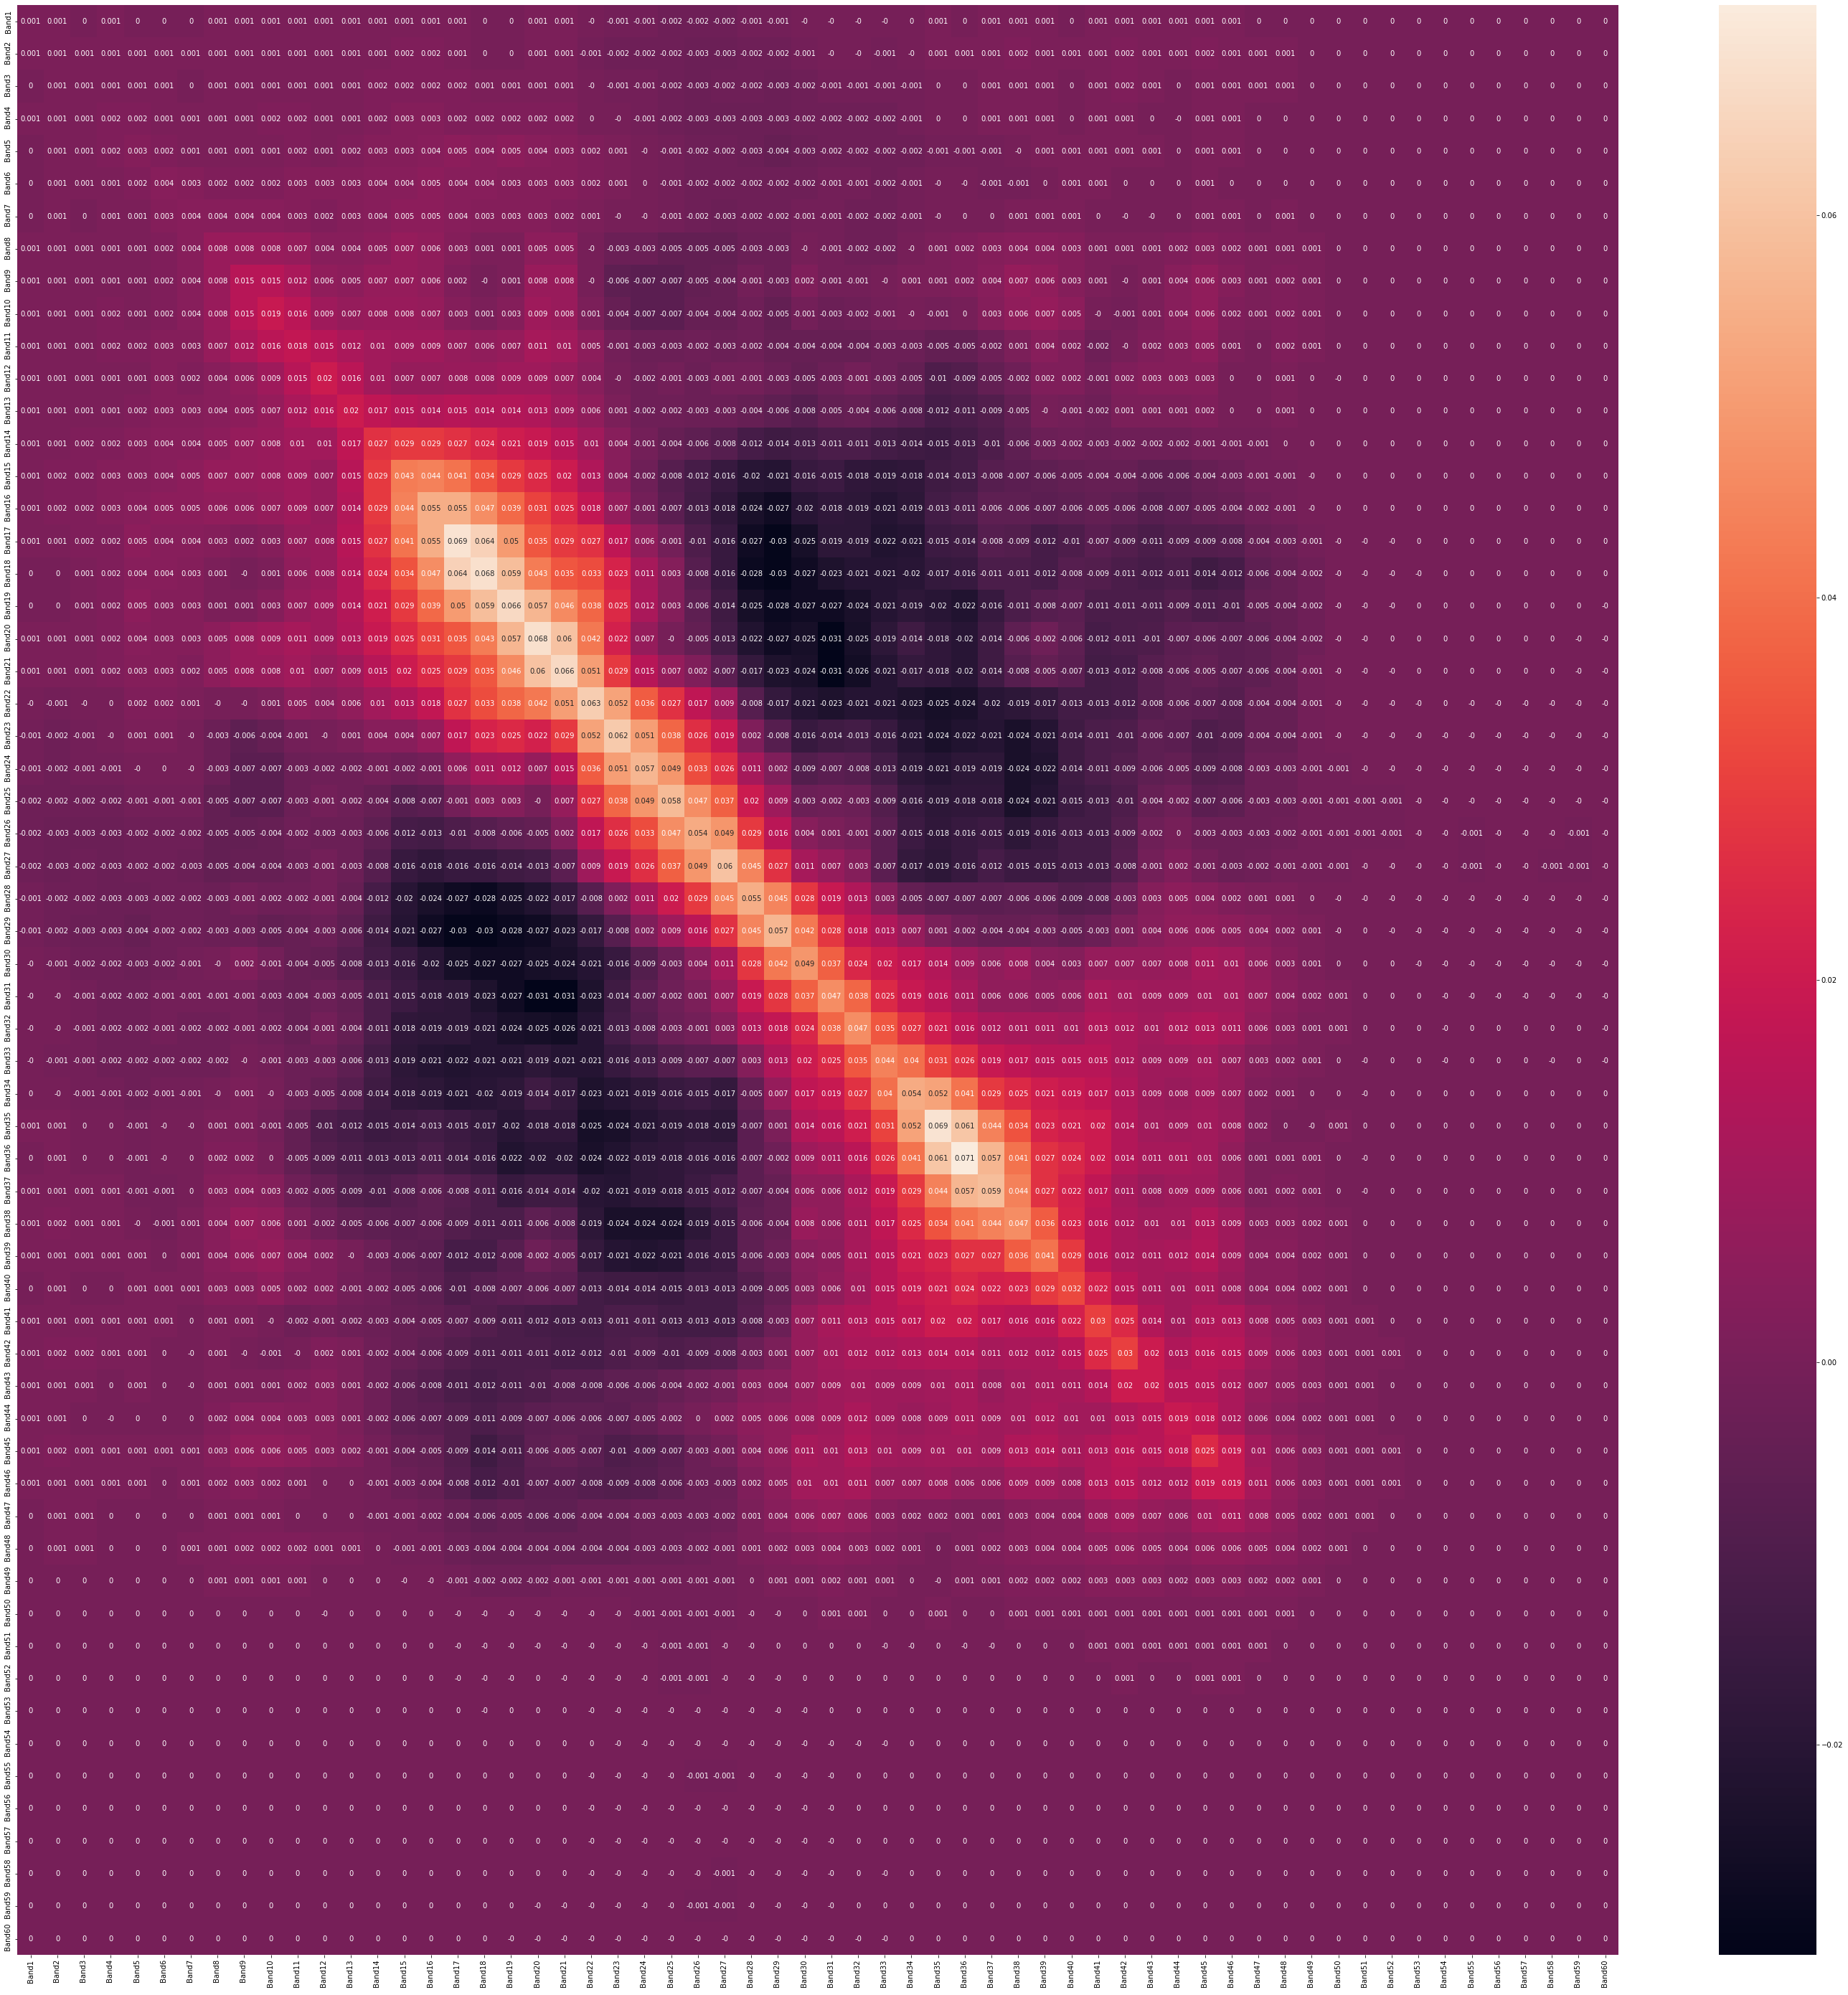

In [ ]:
Vector_Peso = data.mean(axis = 1) # Calculamos el promedio de cada fila
Media_Ponderada = (data.T*Vector_Peso).sum(axis = 1) / Vector_Peso.sum() # Cálculo de la Media Ponderada - Centroide
Cardinalidad_Pesos = Vector_Peso.sum()
Datas = data.values
Medias_P = Media_Ponderada.values
Vec = Vector_Peso.values
C = []

for n in range(data.shape[1]):
  A = (Datas[:,n] - np.tile(Medias_P[n],(data.shape[0],1)).T)
  for m in range(data.shape[1]):
    B = (Datas[:,m] - np.tile(Medias_P[m],(data.shape[0],1)).T)
    C.append(np.sum(Vec.T*A*B) / Cardinalidad_Pesos)

Matriz_Cova_Ponderada = pd.DataFrame(np.asarray(np.round(C,3)).reshape((data.shape[1], data.shape[1])),
                                     columns = Indices_Tabla_Medias, index = Indices_Tabla_Medias)

plt.figure(figsize=(50,50))
ax = sns.heatmap(Matriz_Cova_Ponderada, annot=True, fmt='g', 
                 xticklabels = Indices_Tabla_Medias, yticklabels = Indices_Tabla_Medias)
plt.show()

Aquellas relaciones entre dos variables con una covarianza positiva indica que las dos variables tienen a moverse en una misma dirección. Si la covarianza es negativa, entonces las dos variables se mueven en una dirección opuesta. Si el valor de la covarianza es cero, las variables no se mueven en ninguna dirección, y por consiguiente, ambas variables son similares entre si.

## Pesos Relativos

Teniendo en cuenta la forma como se clacula la covarianza por muestreo ponderado, vamos a utilizar los pesos normalizados para calcular una nueva matriz de covarianza basado en pesos relativos. Veamos el programa principal:

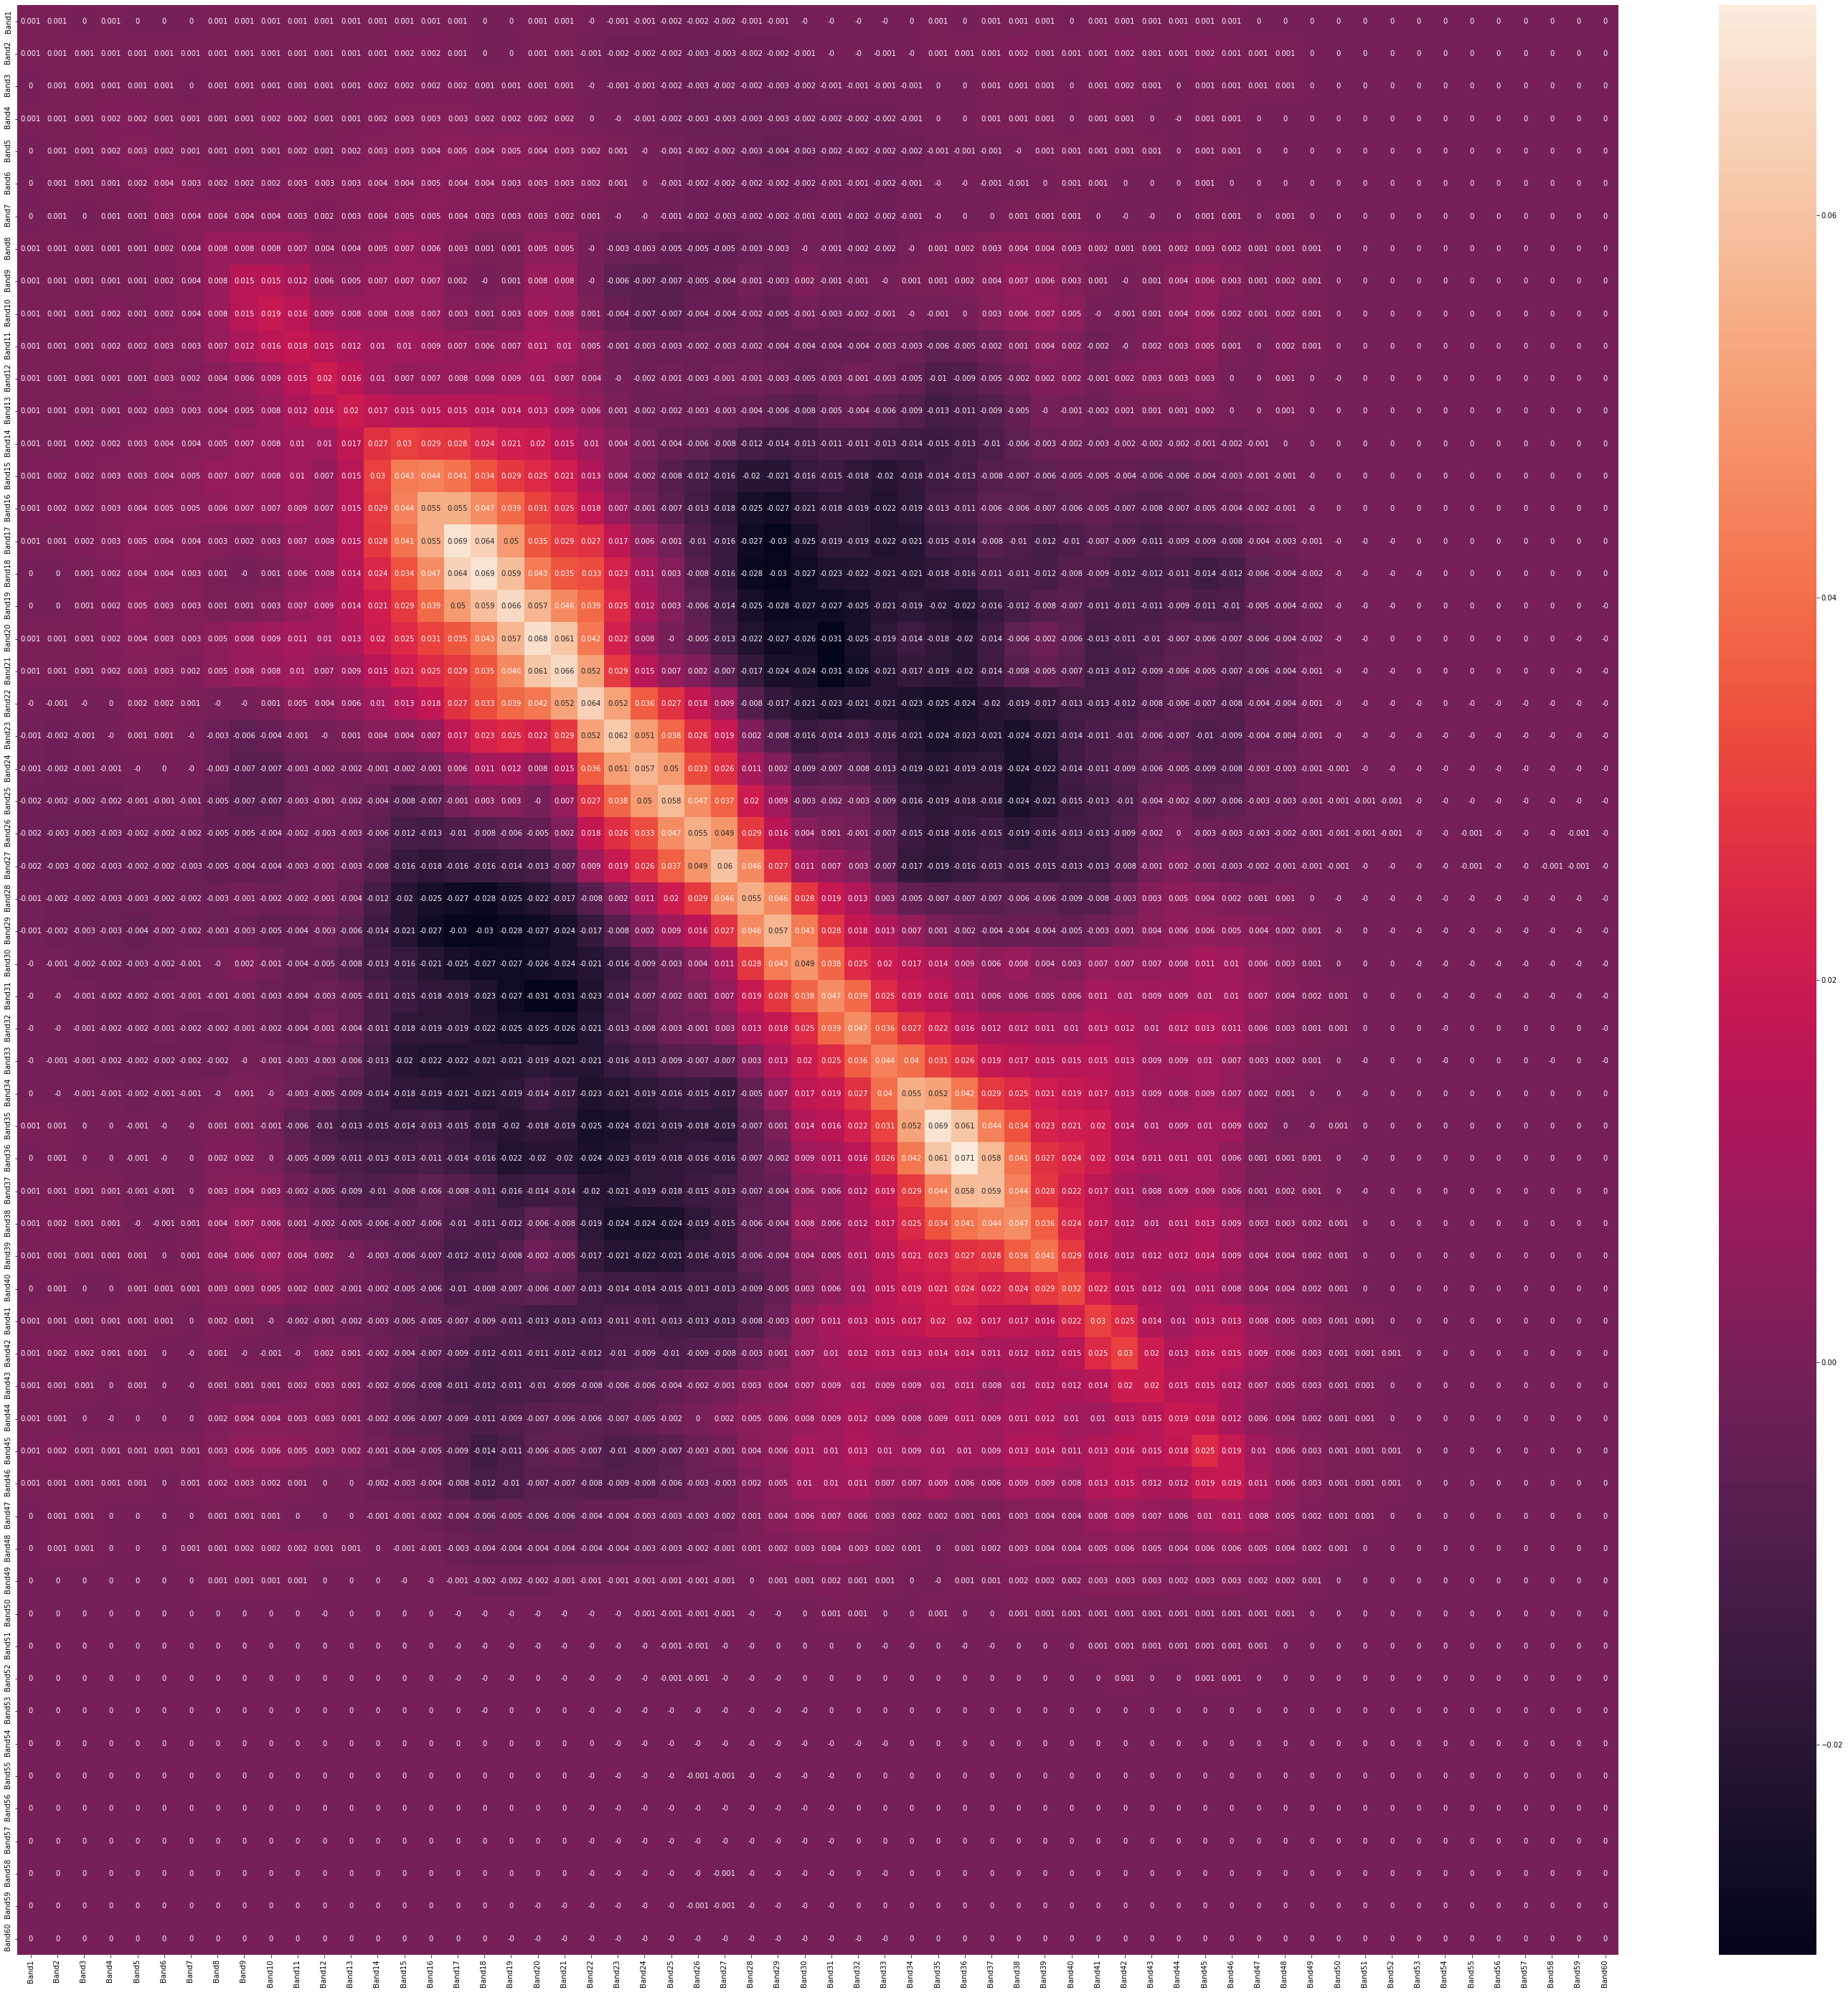

In [ ]:
Vector_Peso = data.mean(axis = 1) # Calculamos el promedio de cada fila
Vector_Peso_Normalizado = Vector_Peso/(Vector_Peso.sum())
Media_Ponderada_Normalizado = (data.T*Vector_Peso_Normalizado).sum(axis = 1) / Vector_Peso_Normalizado.sum()
Cardinalidad_Pesos = 1 - ((Vector_Peso_Normalizado**2).sum()) # Cambia el cálculo de la cardinalidad de los pesos
Datas = data.values
Medias_P = Media_Ponderada_Normalizado.values
Vec = Vector_Peso_Normalizado.values
C = []

for n in range(data.shape[1]):
  A = (Datas[:,n] - np.tile(Medias_P[n],(data.shape[0],1)).T)
  for m in range(data.shape[1]):
    B = (Datas[:,m] - np.tile(Medias_P[m],(data.shape[0],1)).T)
    C.append(np.sum(Vec.T*A*B) / Cardinalidad_Pesos)

Matriz_Cova_Pesos_Relativos = pd.DataFrame(np.asarray(np.round(C,3)).reshape((data.shape[1], data.shape[1])),
                                     columns = Indices_Tabla_Medias, index = Indices_Tabla_Medias)

plt.figure(figsize=(50,50))
ax = sns.heatmap(Matriz_Cova_Pesos_Relativos, annot=True, fmt='g', 
                 xticklabels = Indices_Tabla_Medias, yticklabels = Indices_Tabla_Medias)
plt.show()

## Análisis Estadístico con datos categóricos o con valores enteros positivos

Consideremos un conjunto de valores discretos, $\lbrace v_1,\ldots, v_N \rbrace$, tal que podemos caracterizar el número de veces que en la muestra de $N$ datos aparece cada valor, $\lbrace n_1, \ldots, n_K\rbrace$, donde:

$$N = \sum_{j=1}^k n_j$$

Lo anterior indica que la suma total del número de veces que aparece uno o más valores discretos es igual al número total de muestras de los datos. Teniendo en cuenta esta característica, los estadísticos de una variable nominal $V$ son las siguientes:

**Moda:** Es el valor que aparece más veces en un conjunto de datos discretos.

$$v_j = arg\max_j\lbrace n_1, \ldots, n_j, \ldots. n_k \rbrace$$

**Media Nominal:** Es un valor que para una variable nominal dada, se obtiene para $m$ casos o sucesos observados en $N$ datos:

$$\rho = \frac{m}{N}$$

Una forma alternativa para representar $\rho$ es mediante una expresión que asigna una variable binaria con cada ejemplo de un conjunto datos:

$$\rho = \frac{1}{N}\sum_{i=1}^N v_i$$

donde $v_i = 1$ si hay correspondencia en una categoría y $v_i = 0$ en otro caso.

**Varianza Nominal:** Es un valor que estima la varianza de cada categoría:

$$\sigma^2(\rho) = \frac{1}{N}\sum_{i=1}^N (v_i - \rho) = \rho(1 - \rho)$$

Como caso curioso, si $\rho = 0.5$ entonces se obtiene la máxima varianza nominal y se puede estimar $\rho = \frac{1}{k}$, siendo $k$ es el númerop de valores que toma la variable nominal.

**Desviación estándar nominal:** Es un valor de la desviación de cada categoría:

$$\sigma(\rho) = \sqrt{\rho(1 - \rho)}$$

**Histograma para variable nominal**: Para crear una representación gráfica del histograma con variable nominal, se calcula la distribución de frecuencias de los valores en $N$ datos de for porcentual:

$$P_1 = 100\left ( \frac{n_1}{N} \right)\%;\ldots; P_k = 100\left ( \frac{n_k}{N} \right)\%$$

Por consiguiente, cada $P_1 \ldots, P_K$ tiene un valor porcentual por cada categoría.

Veamos un ejemplo con un pequeño conjunto de datos categóricos:

In [ ]:
datos = sns.load_dataset("tips")
datos = datos.loc[:,['sex', 'smoker', 'day', 'time', 'size']]
display(datos)

,sex,smoker,day,time,size
0,Female,No,Sun,Dinner,2
1,Male,No,Sun,Dinner,3
2,Male,No,Sun,Dinner,3
3,Male,No,Sun,Dinner,2
4,Female,No,Sun,Dinner,4
...,...,...,...,...,...
239,Male,No,Sat,Dinner,3
240,Female,Yes,Sat,Dinner,2
241,Male,Yes,Sat,Dinner,2
242,Male,No,Sat,Dinner,2


In [ ]:
a = datos['sex'].value_counts(normalize = False)
m = datos.shape[0]
print("Muestras por cada categoría para una variable nominal = \n", a)
print("\n")
print("Número de datos = ", m)
print("\n")
media_nominal = a/m
varianza_nominal = media_nominal*(1 - media_nominal)
desd_nominal = np.sqrt(varianza_nominal)
print("Media nominal en Porcentaje = \n",100*media_nominal)
print("\n")
print("Varianza nominal en Porcentaje = \n",100*varianza_nominal)
print("\n")
print("Desviación nominal en Porcentaje = \n",100*desd_nominal)

Muestras por cada categoría para una variable nominal = 
 Male      157
Female     87
Name: sex, dtype: int64


Número de datos =  244


Media nominal en Porcentaje = 
 Male      64.344262
Female    35.655738
Name: sex, dtype: float64


Varianza nominal en Porcentaje = 
 Male      22.942421
Female    22.942421
Name: sex, dtype: float64


Desviación nominal en Porcentaje = 
 Male      47.898248
Female    47.898248
Name: sex, dtype: float64


In [ ]:
d = datos.loc[:,['sex','smoker']]
L1 = d.loc[(d['sex'] == 'Male') & (d['smoker'] == 'Yes')]
L2 = d.loc[(d['sex'] == 'Female') & (d['smoker'] == 'Yes')]
n1 = L1.shape[0]
n2 = L2.shape[0]
m = datos.shape[0]
media_1 = n1/m
media_2 = n2/m
var_1 = media_1*(1 - media_1)
var_2 = media_2*(1 - media_2)
des_1 = np.sqrt(var_1)
des_2 = np.sqrt(var_2)
print("Media nominal hombres que fuman = {:.3f} %".format(100*media_1))
print("Media nominal mujeres que fuman = {:.3f} %".format(100*media_2))
print("Varianza nominal hombres que fuman = {:.3f} %".format(100*var_1))
print("Varianza nominal mujeres que fuman = {:.3f} %".format(100*var_2))
print("Desviación nominal hombres que fuman = {:.3f} %".format(100*des_1))
print("Desviación nominal mujeres que fuman = {:.3f} %".format(100*des_2))

Media nominal hombres que fuman = 24.590 %
Media nominal mujeres que fuman = 13.525 %
Varianza nominal hombres que fuman = 18.543 %
Varianza nominal mujeres que fuman = 11.695 %
Desviación nominal hombres que fuman = 43.062 %
Desviación nominal mujeres que fuman = 34.199 %


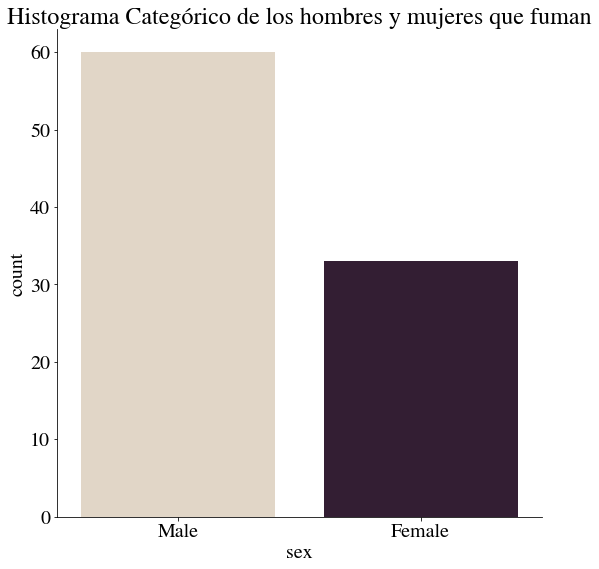

In [ ]:
matplotlib.rcParams.update({'font.size': 20, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
DATA = np.vstack([L1,L2]) # Unificar los conjuntos de datos L1 y L2
data_new = pd.DataFrame(DATA, columns = ['sex','smoker'])
sns.catplot(x="sex", kind = "count", palette="ch:.25", data = data_new, height = 8, aspect = 1)
plt.title("Histograma Categórico de los hombres y mujeres que fuman")
plt.show()

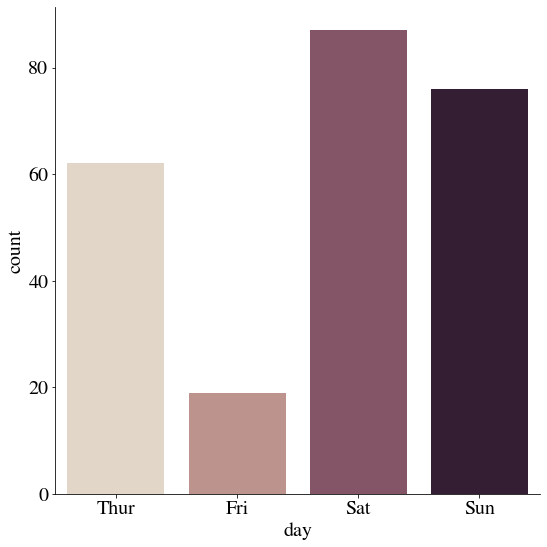

In [ ]:
matplotlib.rcParams.update({'font.size': 20, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
sns.catplot(x="day", kind="count", palette="ch:.25", data = datos, height = 8, aspect = 1)
plt.show()